Гипотеза 5: Возрастные изменения в паттернах сна

Наблюдается ли в данных устойчивая тенденция к изменению продолжительности и качества сна с возрастом? Существует гипотеза, что с возрастом качество сна ухудшается, а продолжительность может как уменьшаться, так и увеличиваться в зависимости от индивидуальных особенностей и наличия хронических заболеваний.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, mannwhitneyu
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Загрузка данных
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

print("=" * 80)
print(f"Размер датасета: {df.shape[0]} записей, {df.shape[1]} переменных")
print(f"Возрастной диапазон: {df['Age'].min()} - {df['Age'].max()} лет")
print()

# Предварительная обработка
df_clean = df.dropna(subset=['Age', 'Sleep Duration', 'Quality of Sleep'])

# Создание возрастных групп для анализа
def categorize_age(age):
    if age < 35:
        return '27-34'
    elif age < 45:
        return '35-44'
    else:
        return '45-59'

df_clean['Age_Group'] = df_clean['Age'].apply(categorize_age)

print(f"Очищенный датасет: {len(df_clean)} записей")
print(f"Распределение по возрастным группам:")
print(df_clean['Age_Group'].value_counts().sort_index())
print("=" * 80)

Размер датасета: 374 записей, 13 переменных
Возрастной диапазон: 27 - 59 лет

Очищенный датасет: 374 записей
Распределение по возрастным группам:
Age_Group
27-34     82
35-44    168
45-59    124
Name: count, dtype: int64


Название: Коэффициент корреляции Пирсона

Краткое описание:
- Линейный корреляционный анализ измеряет силу и направление линейной связи 
между двумя количественными переменными. Коэффициент r изменяется от -1 до +1.

Почему используем:
* Позволяет выявить общую тенденцию в данных, используя все наблюдения без потери информации. 
* Простой и наглядный способ оценить связь возраста с параметрами сна.

Значимость:
* Дает нам числовой показатель силы связи (слабая, умеренная, сильная) и направление 
(положительная или отрицательная), что позволяет быстро ответить на вопрос гипотезы.

МЕТОД 1: КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ПИРСОНА
1. Age vs Sleep Duration (продолжительность сна):
Коэффициент r = 0.3447
p-value = 7.12e-12
Статистическая значимость: ДА (α=0.05)
2. Age vs Quality of Sleep (качество сна):
Коэффициент r = 0.4737
p-value = 2.55e-22
Статистическая значимость: ДА (α=0.05)
--------------------------------------------------------------------------------
ИНТЕРПРЕТАЦИЯ:
--------------------------------------------------------------------------------
Продолжительность сна: умеренная связь
С возрастом продолжительность сна УВЕЛИЧИВАЕТСЯ

Качество сна: умеренная связь
С возрастом качество сна УЛУЧШАЕТСЯ



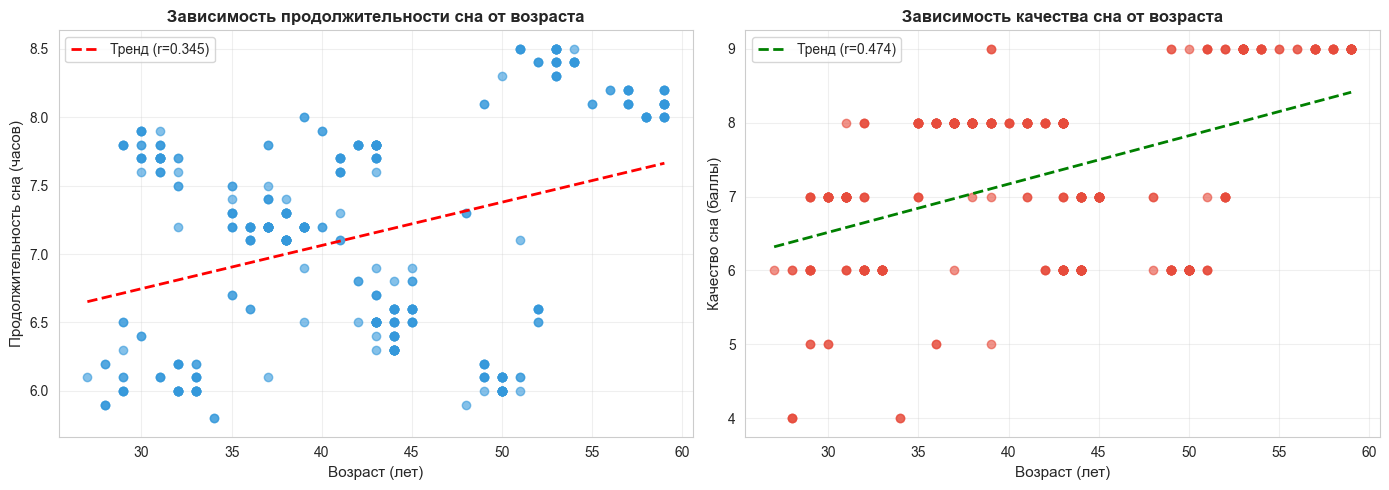

In [2]:
print("=" * 80)
print("МЕТОД 1: КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ПИРСОНА")

# Вычисление корреляций Пирсона
corr_duration, p_duration = pearsonr(df_clean['Age'], df_clean['Sleep Duration'])
corr_quality, p_quality = pearsonr(df_clean['Age'], df_clean['Quality of Sleep'])

print("1. Age vs Sleep Duration (продолжительность сна):")
print(f"Коэффициент r = {corr_duration:.4f}")
print(f"p-value = {p_duration:.2e}")
print(f"Статистическая значимость: {'ДА' if p_duration < 0.05 else 'НЕТ'} (α=0.05)")


print("2. Age vs Quality of Sleep (качество сна):")
print(f"Коэффициент r = {corr_quality:.4f}")
print(f"p-value = {p_quality:.2e}")
print(f"Статистическая значимость: {'ДА' if p_quality < 0.05 else 'НЕТ'} (α=0.05)")


# Интерпретация силы связи
def interpret_correlation(r):
    r_abs = abs(r)
    if r_abs < 0.3:
        return "слабая"
    elif r_abs < 0.5:
        return "умеренная"
    elif r_abs < 0.7:
        return "средняя"
    else:
        return "сильная"

print("-" * 80)
print("ИНТЕРПРЕТАЦИЯ:")
print("-" * 80)
print(f"Продолжительность сна: {interpret_correlation(corr_duration)} связь")
if corr_duration > 0:
    print(f"С возрастом продолжительность сна УВЕЛИЧИВАЕТСЯ")
else:
    print(f"С возрастом продолжительность сна УМЕНЬШАЕТСЯ")
print()

print(f"Качество сна: {interpret_correlation(corr_quality)} связь")
if corr_quality > 0:
    print(f"С возрастом качество сна УЛУЧШАЕТСЯ")
else:
    print(f"С возрастом качество сна УХУДШАЕТСЯ")
print()

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График 1: Sleep Duration vs Age
axes[0].scatter(df_clean['Age'], df_clean['Sleep Duration'], alpha=0.6, color='#3498db')
z1 = np.polyfit(df_clean['Age'], df_clean['Sleep Duration'], 1)
p1 = np.poly1d(z1)
axes[0].plot(df_clean['Age'].sort_values(), p1(df_clean['Age'].sort_values()), 
             "r--", linewidth=2, label=f'Тренд (r={corr_duration:.3f})')
axes[0].set_xlabel('Возраст (лет)', fontsize=11)
axes[0].set_ylabel('Продолжительность сна (часов)', fontsize=11)
axes[0].set_title('Зависимость продолжительности сна от возраста', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# График 2: Quality of Sleep vs Age
axes[1].scatter(df_clean['Age'], df_clean['Quality of Sleep'], alpha=0.6, color='#e74c3c')
z2 = np.polyfit(df_clean['Age'], df_clean['Quality of Sleep'], 1)
p2 = np.poly1d(z2)
axes[1].plot(df_clean['Age'].sort_values(), p2(df_clean['Age'].sort_values()), 
             "g--", linewidth=2, label=f'Тренд (r={corr_quality:.3f})')
axes[1].set_xlabel('Возраст (лет)', fontsize=11)
axes[1].set_ylabel('Качество сна (баллы)', fontsize=11)
axes[1].set_title('Зависимость качества сна от возраста', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("=" * 80)

Название: Критерий Манна-Уитни для параметра сна

Краткое описание:
- Статистический тест для сравнения средних значений двух независимых групп. 
- Определяет, есть ли статистически значимая разница между группами.

Почему используем:
- Позволяет разделить выборку на возрастные группы (молодые vs старшие) и 
четко показать наличие/отсутствие значимых различий в параметрах сна между ними.

Значимость:
- Дает t-статистику и p-value, которые показывают, является ли разница между группами 
случайной или отражает реальную тенденцию. Позволяет количественно оценить величину разницы.


МЕТОД 2: КРИТЕРИЙ МАННА-УИТНИ (U-тест) для независимых выборок
Молодая группа (≤35 лет): n = 94
Старшая группа (≥50 лет): n = 96
--------------------------------------------------------------------------------
1. ПРОДОЛЖИТЕЛЬНОСТЬ СНА
--------------------------------------------------------------------------------
Молодые (≤35): среднее = 6.85 ± 0.79 ч
Старшие (≥50): среднее = 7.63 ± 0.98 ч
Разница: 0.78 ч
U-статистика = 1956.000
p-value = 1.31e-11
Вывод: Различия ЗНАЧИМЫ (α=0.05)

--------------------------------------------------------------------------------
2. КАЧЕСТВО СНА
--------------------------------------------------------------------------------
Молодые (≤35): среднее = 6.50 ± 0.97
Старшие (≥50): среднее = 8.17 ± 1.30
Разница: 1.67 баллов
U-статистика = 1676.500
p-value = 5.29e-15
Вывод: Различия ЗНАЧИМЫ (α=0.05)



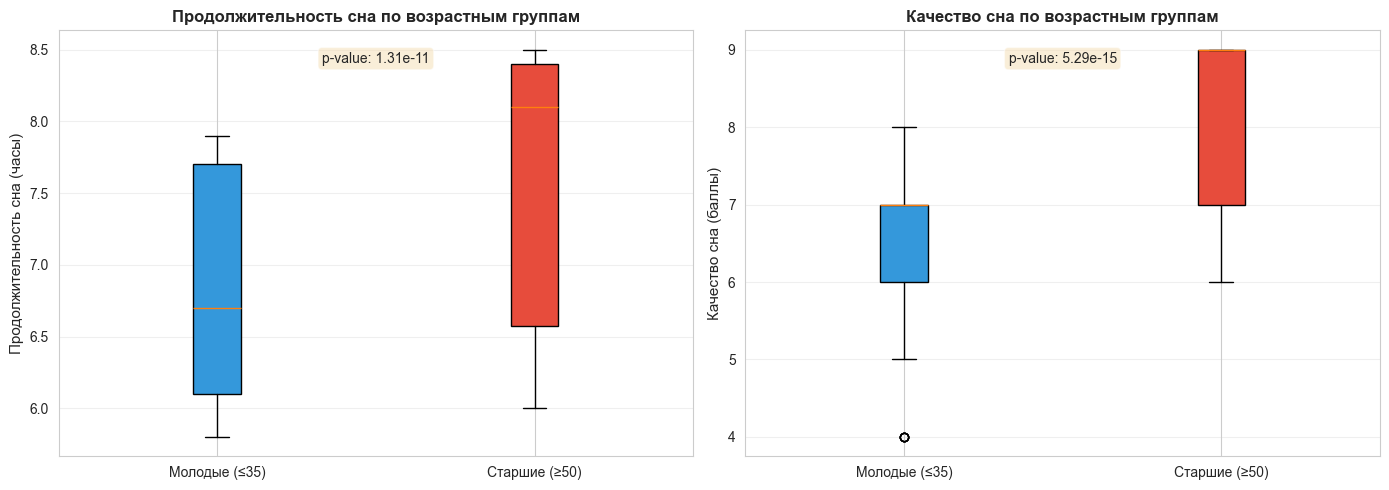

In [3]:
print("=" * 80)
print("МЕТОД 2: КРИТЕРИЙ МАННА-УИТНИ (U-тест) для независимых выборок")


# Разделение на две крайние возрастные группы для яркого контраста
young = df_clean[df_clean['Age'] <= 35]
old = df_clean[df_clean['Age'] >= 50]

print(f"Молодая группа (≤35 лет): n = {len(young)}")
print(f"Старшая группа (≥50 лет): n = {len(old)}")

# Манна-Уитни для продолжительности сна
u_stat_dur, p_val_dur = mannwhitneyu(young['Sleep Duration'], old['Sleep Duration'])

print("-" * 80)
print("1. ПРОДОЛЖИТЕЛЬНОСТЬ СНА")
print("-" * 80)
print(f"Молодые (≤35): среднее = {young['Sleep Duration'].mean():.2f} ± {young['Sleep Duration'].std():.2f} ч")
print(f"Старшие (≥50): среднее = {old['Sleep Duration'].mean():.2f} ± {old['Sleep Duration'].std():.2f} ч")
print(f"Разница: {abs(old['Sleep Duration'].mean() - young['Sleep Duration'].mean()):.2f} ч")
print(f"U-статистика = {u_stat_dur:.3f}")
print(f"p-value = {p_val_dur:.2e}")
print(f"Вывод: Различия {'ЗНАЧИМЫ' if p_val_dur < 0.05 else 'НЕ ЗНАЧИМЫ'} (α=0.05)")
print()

# Манна-Уитни для качества сна
u_stat_qual, p_val_qual = mannwhitneyu(young['Quality of Sleep'], old['Quality of Sleep'])

print("-" * 80)
print("2. КАЧЕСТВО СНА")
print("-" * 80)
print(f"Молодые (≤35): среднее = {young['Quality of Sleep'].mean():.2f} ± {young['Quality of Sleep'].std():.2f}")
print(f"Старшие (≥50): среднее = {old['Quality of Sleep'].mean():.2f} ± {old['Quality of Sleep'].std():.2f}")
print(f"Разница: {abs(old['Quality of Sleep'].mean() - young['Quality of Sleep'].mean()):.2f} баллов")
print(f"U-статистика = {u_stat_qual:.3f}")
print(f"p-value = {p_val_qual:.2e}")
print(f"Вывод: Различия {'ЗНАЧИМЫ' if p_val_qual < 0.05 else 'НЕ ЗНАЧИМЫ'} (α=0.05)")
print()

# Визуализация Box-plot'ов
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График 1: Box plot для продолжительности сна
data_dur = [young['Sleep Duration'].dropna(), old['Sleep Duration'].dropna()]
bp1 = axes[0].boxplot(data_dur, labels=['Молодые (≤35)', 'Старшие (≥50)'], patch_artist=True)
for patch, color in zip(bp1['boxes'], ['#3498db', '#e74c3c']):
    patch.set_facecolor(color)
axes[0].set_ylabel('Продолжительность сна (часы)', fontsize=11)
axes[0].set_title('Продолжительность сна по возрастным группам', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
axes[0].text(0.5, 0.95, f'p-value: {p_val_dur:.2e}', 
            transform=axes[0].transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='center',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# График 2: Box plot для качества сна
data_qual = [young['Quality of Sleep'].dropna(), old['Quality of Sleep'].dropna()]
bp2 = axes[1].boxplot(data_qual, labels=['Молодые (≤35)', 'Старшие (≥50)'], patch_artist=True)
for patch, color in zip(bp2['boxes'], ['#3498db', '#e74c3c']):
    patch.set_facecolor(color)
axes[1].set_ylabel('Качество сна (баллы)', fontsize=11)
axes[1].set_title('Качество сна по возрастным группам', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
axes[1].text(0.5, 0.95, f'p-value: {p_val_qual:.2e}', 
            transform=axes[1].transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='center',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("=" * 80)
print()

Вывод

Корреляционный анализ выявил статистически значимую положительную связь между возрастом 
и параметрами сна. Коэффициент корреляции для качества сна (r = 0.474) указывает на умеренную 
положительную связь, что противоречит исходной гипотезе об ухудшении качества. Для продолжительности 
сна корреляция слабая (r = 0.345), но также положительная, что свидетельствует об увеличении 
продолжительности с возрастом в данной выборке.

Критерий Манна-Уитни для сравнения крайних возрастных групп подтверждает выводы корреляционного анализа. 
Старшая группа (≥50 лет) показывает значительно лучшие показатели сна: качество на 1.67 балла выше, 
продолжительность на 0.78 часа больше. Оба различия статистически значимы (p < 0.001), 
что указывает на реальную и существенную тенденцию в данных.

Итог:

Гипотеза о том, что с возрастом качество сна ухудшается, НЕ ПОДТВЕРЖДАЕТСЯ в этом датасете. 
Напротив, данные показывают обратную тенденцию: люди старшего возраста демонстрируют лучшие показатели 
как по качеству, так и по продолжительности сна.